In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# If you already ran the cleaning script:
df = pd.read_csv("../data/googleplaystore_clean.csv", encoding='latin1')

# Or, load the raw and do a quick clean (if you prefer to keep everything in notebook)
# raw = pd.read_csv("../data/googleplaystore.csv", encoding='latin1')
# <apply similar cleaning logic as in src/data_cleaning.py>


In [3]:
df.shape
df.head()
df.info()
df.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9660 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Size_MB         8432 non-null   float64
dtypes: float64(5), object(9)
memory usage: 1.0+ MB


Rating            1463
Size_MB           1228
Current Ver          8
Android Ver          3
Installs             1
Reviews              1
Price                1
Content Rating       1
Last Updated         1
Type                 1
Size                 0
Category             0
App                  0
Genres               0
dtype: int64

Text(0.5, 1.0, 'Installs vs Reviews')

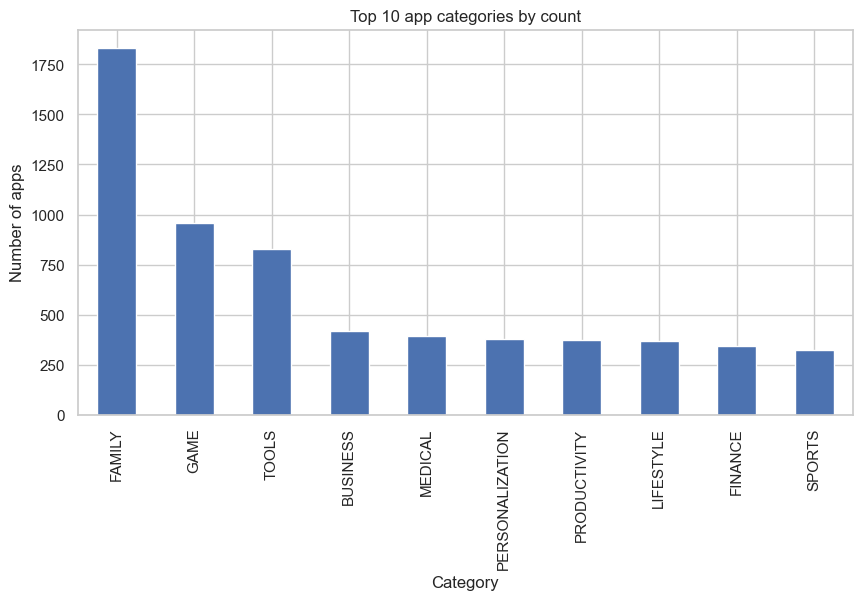

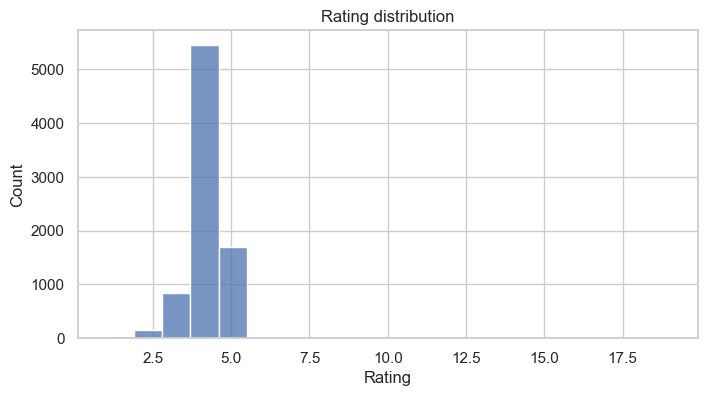

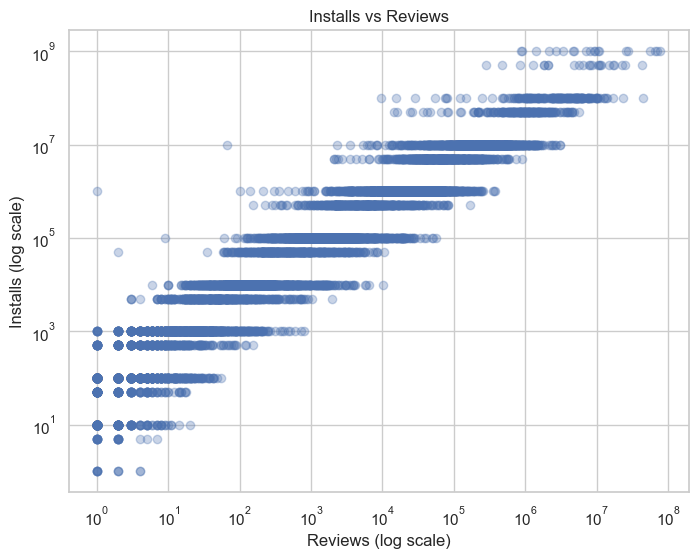

In [4]:
# Top categories
top_cats = df['Category'].value_counts().nlargest(10)
top_cats.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 app categories by count')
plt.xlabel('Category'); plt.ylabel('Number of apps')

# Rating distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Rating'].dropna(), bins=20, kde=False)
plt.title('Rating distribution')

# Installs vs Reviews
plt.figure(figsize=(8,6))
plt.scatter(df['Reviews'], df['Installs'], alpha=0.3)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Reviews (log scale)'); plt.ylabel('Installs (log scale)')
plt.title('Installs vs Reviews')


Text(0.5, 1.0, 'Correlation between numeric columns')

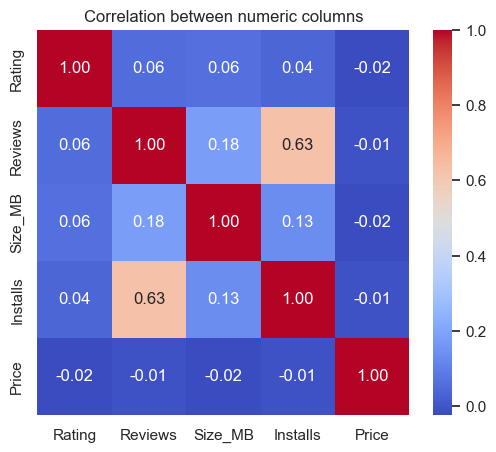

In [5]:
num_cols = ['Rating','Reviews','Size_MB','Installs','Price']
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between numeric columns')
